In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
train=pd.read_csv('data/Housing/train.csv')
test=pd.read_csv('data/Housing/test.csv')
sample_submission=pd.read_csv('data/Housing/sample_submission.csv')

In [52]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [53]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Some first exploration of features

C:\Users\Josh\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


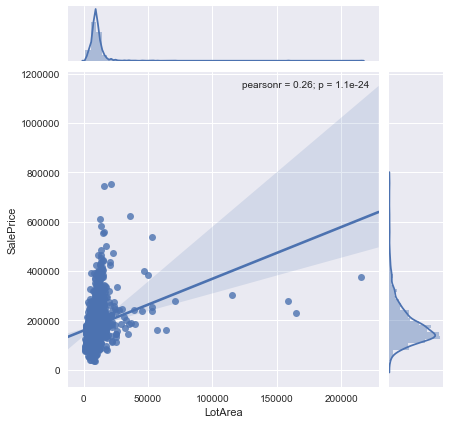

In [54]:
sns.jointplot(x='LotArea',y='SalePrice', data=train, kind="reg")

In [55]:
train.corr()  #Look for items with high correlation

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


Correlation with saleprice:
>\>.7
GrLivArea
OverallQual

>\>.6
GarageArea
GarageCars
TotalBsmtSF
1stFlrSF

>\>.5
FullBath
TotRmsAbvGrd
YearBuilt
YearRemodAdd

>\>.4
MasVnrArea
Fireplaces
GarageYrBlt

In [56]:
#Most influential features (p>.4)
train[['GrLivArea', 'OverallQual', 'GarageArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd','MasVnrArea','Fireplaces','GarageYrBlt','SalePrice']].corr()

,GrLivArea,OverallQual,GarageArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,Fireplaces,GarageYrBlt,SalePrice
GrLivArea,1.000000,0.593007,0.468997,0.467247,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389,0.390857,0.461679,0.231197,0.708624
OverallQual,0.593007,1.000000,0.562022,0.600671,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684,0.411876,0.396765,0.547766,0.790982
GarageArea,0.468997,0.562022,1.000000,0.882475,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600,0.373066,0.269141,0.564567,0.623431
GarageCars,0.467247,0.600671,0.882475,1.000000,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622,0.364204,0.300789,0.588920,0.640409
TotalBsmtSF,0.454868,0.537808,0.486665,0.434585,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066,0.363936,0.339519,0.322445,0.613581
1stFlrSF,0.566024,0.476224,0.489782,0.439317,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379,0.344501,0.410531,0.233449,0.605852
FullBath,0.630012,0.550600,0.405656,0.469672,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046,0.276833,0.243671,0.484557,0.560664
TotRmsAbvGrd,0.825489,0.427452,0.337822,0.362289,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740,0.280682,0.326114,0.148112,0.533723
YearBuilt,0.199010,0.572323,0.478954,0.537850,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855,0.315707,0.147716,0.825667,0.522897
YearRemodAdd,0.287389,0.550684,0.371600,0.420622,0.291066,0.240379,0.439046,0.191740,0.592855,1.000000,0.179618,0.112581,0.642277,0.507101


In [57]:
#Highly influential features (p>.6)
hi_inf_train=train[['GrLivArea', 'OverallQual', 'GarageArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF']]
hi_inf_train.head()

,GrLivArea,OverallQual,GarageArea,GarageCars,TotalBsmtSF,1stFlrSF
0,1710,7,548,2,856,856
1,1262,6,460,2,1262,1262
2,1786,7,608,2,920,920
3,1717,7,642,3,756,961
4,2198,8,836,3,1145,1145


In [58]:
hi_inf_train[hi_inf_train.isnull().any(axis=1)] #Checking for null entries

,GrLivArea,OverallQual,GarageArea,GarageCars,TotalBsmtSF,1stFlrSF


In [59]:
from sklearn import linear_model
reg=linear_model.LinearRegression()

In [60]:
x_train=hi_inf_train
y_train=train['SalePrice']

In [61]:
hi_inf_test=test[['GrLivArea', 'OverallQual', 'GarageArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF']]
x_test=hi_inf_test

In [62]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [86]:
reg.coef_

array([  4.31228864e+01,   2.39970394e+04,   1.56639341e+01,
         1.45151932e+04,   2.43907676e+01,   1.11859135e+01])

In [63]:
reg.score(x_train,y_train)

0.76191795118628314

In [64]:
x_test[x_test.isnull().any(axis=1)]  #Look for null values

,GrLivArea,OverallQual,GarageArea,GarageCars,TotalBsmtSF,1stFlrSF
660,896,4,280.0,1.0,NaN,896
1116,1828,5,NaN,NaN,859.0,942


In [65]:
x_test=x_test.fillna(0) #Fill Null garage area and basement with 0

In [66]:
x_test[x_test.isnull().any(axis=1)] 

,GrLivArea,OverallQual,GarageArea,GarageCars,TotalBsmtSF,1stFlrSF


In [80]:
y_pred=abs(reg.predict(x_test)) #Abs is a temporary fix to deal with the prices which, for some reason, were negative and so invalid.

In [81]:
my_submission=pd.DataFrame(y_pred)
my_submission['Id']=test['Id']
my_submission.columns=['SalePrice','Id']
my_submission=my_submission[['Id','SalePrice']]

In [82]:
my_submission.head()

,Id,SalePrice
0,1461,113457.503265
1,1462,165325.401681
2,1463,157177.041113
3,1464,179836.887801
4,1465,227017.198181


In [84]:
my_submission[my_submission.SalePrice<0]

,Id,SalePrice


In [85]:
my_submission.to_csv('hi-inf-feat-linear-1', index=False)